# Обработка итоговых результатов

In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Идентификатор паркрана.

In [2]:
parkrun = 'kuzminki'

Список идентификаторов всех российских паркранов находится в файле `russian_parkruns.csv`.

In [3]:
page_all_results = requests.get(f'https://www.parkrun.ru/{parkrun}/results/eventhistory/', 
                                headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})

In [4]:
data = pd.read_html(page_all_results.text)[0]
data = data.drop(columns=data.columns[8:])

In [5]:
data = data.rename(columns={data.columns[0]: 'n', data.columns[1]: 'date',
                           data.columns[2]: 'finishers', data.columns[3]:'volunteers',
                           data.columns[4]: 'men_name', data.columns[5]: 'men_time',
                           data.columns[6]: 'women_name', data.columns[7]: 'women_time'})

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
data[data.columns[1]] = data[data.columns[1]].transform(lambda s: re.search(r'\d\d/\d\d/\d{4}', s)[0])
data[data.columns[2]] = data[data.columns[2]].transform(lambda s: s.replace('finishers', ''))
data[data.columns[3]] = data[data.columns[3]].transform(lambda s: s.replace('volunteers', ''))
data[data.columns[4]] = data[data.columns[4]].transform(lambda s: re.sub(r'\d\d:\d\d:\d\d', '', s))
data[data.columns[6]] = data[data.columns[6]].transform(lambda s: re.sub(r'\d\d:\d\d:\d\d', '', s))

In [8]:
data

,n,date,finishers,volunteers,men_name,men_time,women_name,women_time
0,203,14/03/2020,154,27,Виктор НИКОЛАЕВ,00:15:46,Наталья СЕЛЕЗНЕВА,00:20:13
1,202,07/03/2020,176,37,Дмитрий ТИХОНОВ,00:17:53,Наталья СЕЛЕЗНЕВА,00:20:15
2,201,29/02/2020,185,35,Герман ЖАРОВ,00:18:22,Наталья СЕЛЕЗНЕВА,00:20:35
3,200,22/02/2020,246,32,Дмитрий ТИХОНОВ,00:17:37,Екатерина Лицоева,00:22:27
4,199,15/02/2020,128,24,Юрий ВОЛОДИН,00:17:38,Светлана БЕЛАВИНА,00:22:42
...,...,...,...,...,...,...,...,...
198,5,16/07/2016,42,12,Дмитрий БОНДАРЬ,00:18:36,Светлана КАНТОНИСТОВА,00:22:32
199,4,09/07/2016,46,13,Ринат АВЗЕЛИТДИНОВ,00:18:05,Ольга АКИМОВА,00:23:14
200,3,02/07/2016,27,10,Дмитрий БОНДАРЬ,00:18:52,Янчик КРЖИЖАНОВСКАЯ,00:23:24
201,2,25/06/2016,40,15,Алексей КУХАРЕНКО,00:18:28,Olga LAZAREVA,00:22:15


In [9]:
data[data.columns[5]] = data[data.columns[5]].apply(pd.to_timedelta)
data[data.columns[7]] = data[data.columns[7]].apply(pd.to_timedelta)

## Статистика по мужчинам

### Топ10 мужчин по числу побед

In [10]:
data['men_name'].value_counts().head(10)

Герман ЖАРОВ          44
Юрий ВОЛОДИН          38
Платон КИСЕЛЕВ        14
Дмитрий БОНДАРЬ       13
Александр ТАГАНЦЕВ    12
Максим ПЕТРИЩЕВ        7
Дмитрий ТИХОНОВ        7
Сергей СИЛИН           7
Владимир ИВАНОВ        6
Виктор НИКОЛАЕВ        5
Name: men_name, dtype: int64

### Среднее время мужчины-победителя

Рассчитывается среднее время на всех паркранах, на которых была одержана победа.

Можно видеть чего примерно ждать от того или иного участника.

<AxesSubplot:ylabel='men_name'>

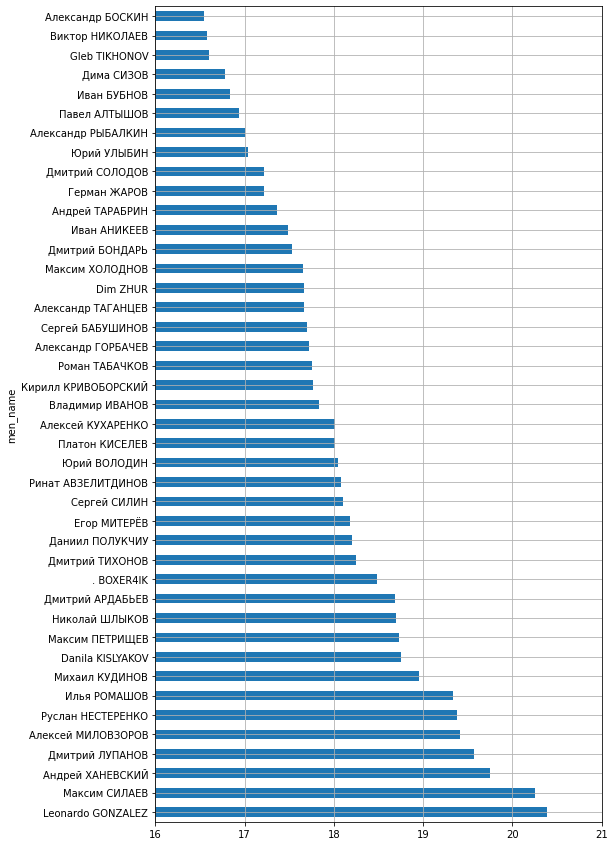

In [11]:
leaders_men_time = data[data.columns[4:6]].groupby('men_name')['men_time']
leaders_men_avr_time = leaders_men_time.sum()/leaders_men_time.count()
leaders_men_avr_time = leaders_men_avr_time.sort_values(ascending=False).astype('timedelta64[s]') / 60
plt.figure(figsize=(8,15))
plt.xlim([int(leaders_men_avr_time[-1]), int(leaders_men_avr_time[0]) + 1])
leaders_men_avr_time.plot(kind = 'barh', grid=True)

### Среднее время победителя (мужчины)

In [12]:
mens_res = data.drop(data.iloc[:,2:4], axis=1).drop(data.iloc[:,6:], axis=1)
mean_mens_time = mens_res[mens_res.columns[3]].mean().components
print(f'{mean_mens_time.minutes}:{mean_mens_time.seconds:02d}')

17:48


### Топ10 мужских результатов

In [13]:
data.sort_values(by=[data.columns[5]]).drop(data.iloc[:,2:4], axis=1).drop(data.iloc[:,6:], axis=1).reset_index(drop=True).head(10)

,n,date,men_name,men_time
0,107,09/06/2018,Иван БУБНОВ,0 days 00:15:43
1,203,14/03/2020,Виктор НИКОЛАЕВ,0 days 00:15:46
2,54,17/06/2017,Виктор НИКОЛАЕВ,0 days 00:15:51
3,100,21/04/2018,Виктор НИКОЛАЕВ,0 days 00:15:59
4,162,15/06/2019,Герман ЖАРОВ,0 days 00:16:07
5,179,12/10/2019,Герман ЖАРОВ,0 days 00:16:09
6,67,16/09/2017,Дима СИЗОВ,0 days 00:16:10
7,19,22/10/2016,Герман ЖАРОВ,0 days 00:16:24
8,172,24/08/2019,Герман ЖАРОВ,0 days 00:16:31
9,130,17/11/2018,Александр БОСКИН,0 days 00:16:33


## Статистика по женщинам

### Топ10 женщин по числу побед

In [14]:
data['women_name'].value_counts().head(10)

Светлана БЕЛАВИНА      17
Светлана КИРЕЕВА       15
Янчик КРЖИЖАНОВСКАЯ    10
Диана ГАБИТОВА         10
Ирина ЕРМАКОВА         10
Алсу ШАГИЕВА            9
Марина ХЛОПКОВА         7
Кристина ЖУРАВЛЕВА      6
Ольга ХМЕЛЕВСКАЯ        6
Людмила ХОДАКОВА        4
Name: women_name, dtype: int64

### Среднее время победителя (женщины)

In [15]:
woman_res = data.drop(data.iloc[:,2:6], axis=1)
mean_woman_time = woman_res[woman_res.columns[3]].mean().components
print(f'{mean_woman_time.minutes}:{mean_woman_time.seconds:02d}')

23:00


### Топ10 женских результатов

In [16]:
data.sort_values(by=[data.columns[7]]).drop(data.iloc[:,2:6], axis=1).reset_index(drop=True).head(10)

,n,date,women_name,women_time
0,68,23/09/2017,Тома СИЗОВА,0 days 00:18:16
1,67,16/09/2017,Тома СИЗОВА,0 days 00:18:44
2,50,20/05/2017,Алсу ШАГИЕВА,0 days 00:18:47
3,14,17/09/2016,Алсу ШАГИЕВА,0 days 00:18:53
4,1,18/06/2016,Алсу ШАГИЕВА,0 days 00:18:57
5,48,06/05/2017,Алсу ШАГИЕВА,0 days 00:19:02
6,72,21/10/2017,Светлана КИРЕЕВА,0 days 00:19:08
7,20,29/10/2016,Nina ZARINA,0 days 00:19:08
8,175,14/09/2019,Екатерина БАШМАКОВА,0 days 00:19:13
9,100,21/04/2018,Алсу ШАГИЕВА,0 days 00:19:13


Среди женщин нет явных постоянных лидеров (участниц, которые регулярно выигрывают).
А сильный разброс времени победительницы говорит также об очень слабой конкуренции и соревновательности.

<AxesSubplot:ylabel='women_name'>

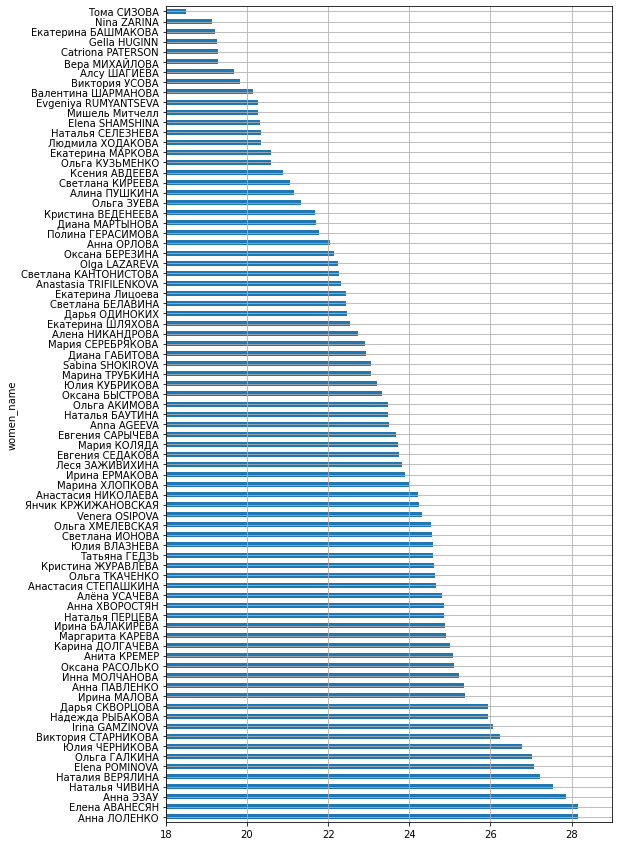

In [17]:
leaders_women_time = data[data.columns[6:]].groupby('women_name')['women_time']
leaders_women_avr_time = leaders_women_time.sum()/leaders_women_time.count()
leaders_women_avr_time = leaders_women_avr_time.sort_values(ascending=False).astype('timedelta64[s]') / 60
plt.figure(figsize=(8,15))
plt.xlim([int(leaders_women_avr_time[-1]), int(leaders_women_avr_time[0]) + 1])
leaders_women_avr_time.plot(kind = 'barh', grid=True)